<h1>knn_lesson</h1>
<h2>iris data-set</h2>

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load data training and testing
train = pd.read_csv('data/knn_train.csv')
test = pd.read_csv('data/knn_test.csv')

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# How many examples of each species in train data
train["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [17]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.7,2.5,1.9,0.5,setosa
1,4.8,2.7,5.1,1.9,setosa
2,4.6,3.1,1.3,0.2,setosa
3,7.0,3.2,4.7,1.4,versicolor
4,5.7,2.5,1.9,0.5,versicolor


In [18]:
# How many examples of each species in test data
test['species'].value_counts()

virginica     3
setosa        3
versicolor    3
Name: species, dtype: int64

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


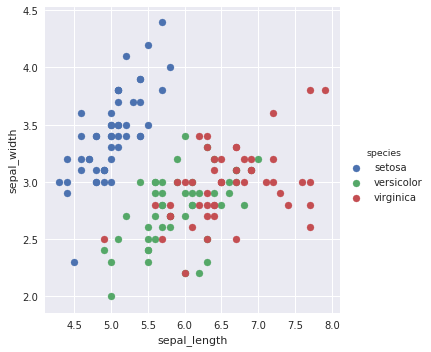

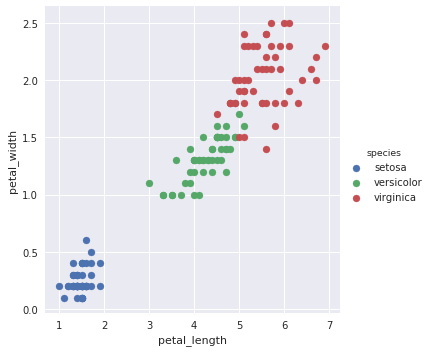

In [19]:
sns.FacetGrid(train, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
sns.FacetGrid(train, hue="species", size=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cols2 = ['species']
trainArr = train.as_matrix(cols)
trainRes = train.as_matrix(cols2)

testArr = test.as_matrix(cols)
testRes = test.as_matrix(cols2)

knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(trainArr, trainRes)

output = knn.predict(testArr)

#print(output)

# or predict on a specific example!
print(knn.predict(testArr[3]))
print(knn.predict([5.5, 2.3, 4.0, 1.3]))
print(testRes[3])

['versicolor']
['versicolor']
['versicolor']


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [21]:
# Accuracy
knn.score(testArr, testRes)

0.77777777777777779

In [22]:
# Accuracy algorithm
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
correct / len(output)

0.7777777777777778